# Diplomski rad 02
28\. veljače 2017.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.debugger import Tracer
import graphviz as gv
import networkx as nx
import pydot
import os
from aux import log_progress
from importlib import reload
import funkcije
reload(funkcije)
from funkcije import *
from collections import Counter

matplotlib.rcParams['figure.figsize'] = (10, 5)

sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
sp500_log = np.log(sp500)


- Konvencija: vremenski nizovi spremljeni su kao vektor-stupci
- **sp500** je matrica s cijenama dionica, **sp500_log** je matrica s logaritmima cijena dionica
- Definicija: **gornje-prizmoidni (3-D) tenzor** je tenzor koji duž prve dimenzije sadrži gornje-trokutaste matrice


## Funkcije
- `rolling_mean_variance(series, T)` računa očekivanje i varijancu nad zadanim podacima (`series`) nad pomičnim prozorom širine `T`
- `flatten_prismatic_tensor(K)` pretvara gornje-prizmoidni 3-D tenzor u 2-D tenzor koji u retcima sadrži izravnate gornje-trokutaste matrice originalnog tenzora
- `encode_pair`
- `encode_pairs`
- `decode_pair`
- `decode_pairs`


## Prikaz primjera distribucije srednjih vrijednosti i varijanci

- **sp500_log_diffs** je izravnati gornje-trokutasti tenzor koji sadrži razlike parova dionica za svaki dan
- **sp500_log_diff_means**, **sp500_log_diff_vars**

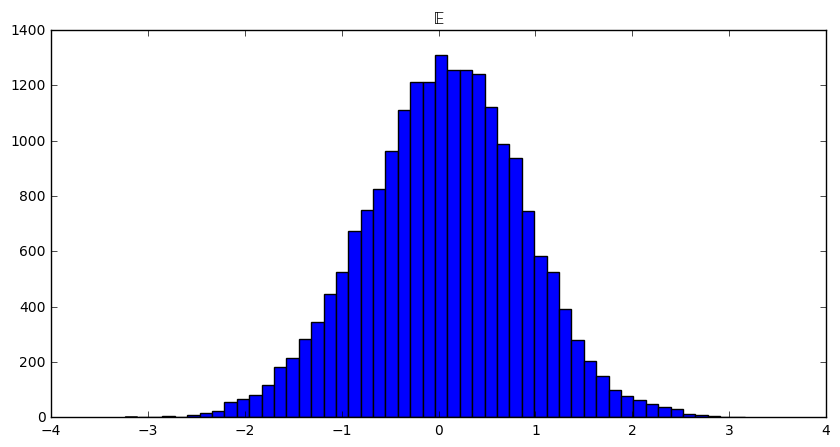

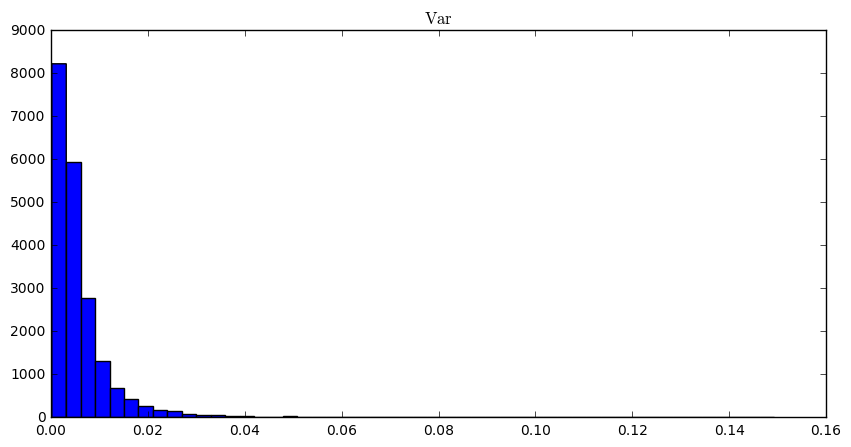

In [2]:
T = 120

sp500_log_diffs = calculate_pairwise_diffs(sp500_log)        
sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)

plt.figure()
plt.hist(sp500_log_diff_means[4321, :], 50)
plt.title('$\\mathrm{\\mathbb{E}}$')
plt.figure()
plt.hist(sp500_log_diff_vars[4321, :], 50);
plt.title('$\\mathrm{Var}$');


## Prikaz parova dionica s najmanjim i najvećim varijancama

### Pobjednici

In [ ]:
T = 120
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)        
sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)
sp500_log_diff_stds = np.sqrt(sp500_log_diff_vars)

N, days = sp500.shape
pairs = N * (N - 1) // 2

codes = sorted(list(range(pairs)), key=lambda c: sp500_log_diff_vars[4321, c])
sorted_vars = sorted(sp500_log_diff_vars[4321, :])
best = decode_pairs(codes[:5], N)
worst = decode_pairs(codes[-5:], N)

# for (i, j), var in zip(best, sorted_vars[:5]):
#     plt.figure()
#     plt.plot(range(4321, 4321 + T), sp500_log[4321:4321 + T, i])
#     plt.plot(range(4321, 4321 + T), sp500_log[4321:4321 + T, j])
#     plt.autoscale(enable=True, axis='x', tight=True)
#     plt.legend((i, j), loc='best')
#     plt.title('$\\mathrm{{Var}}={:.5e}$'.format(var))
#     plt.figure()
#     plt.hist(sp500_log[4321:4321 + T, i] - sp500_log[4321:4321 + T, i])

### Gubitnici

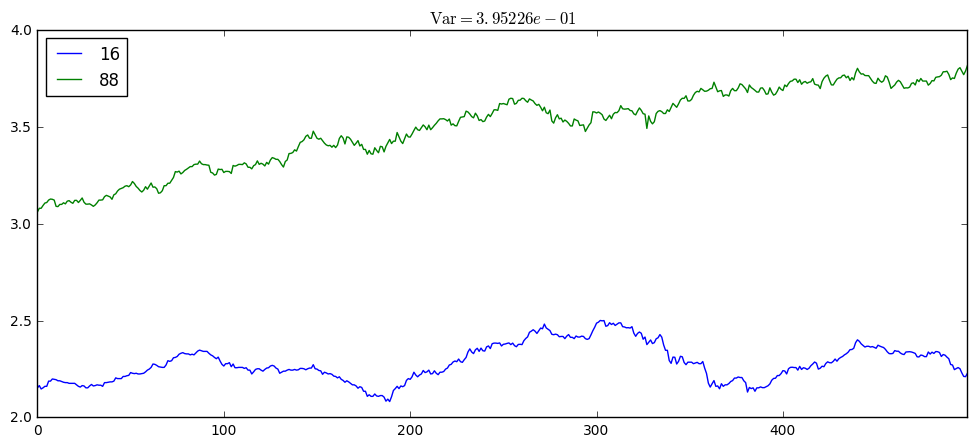

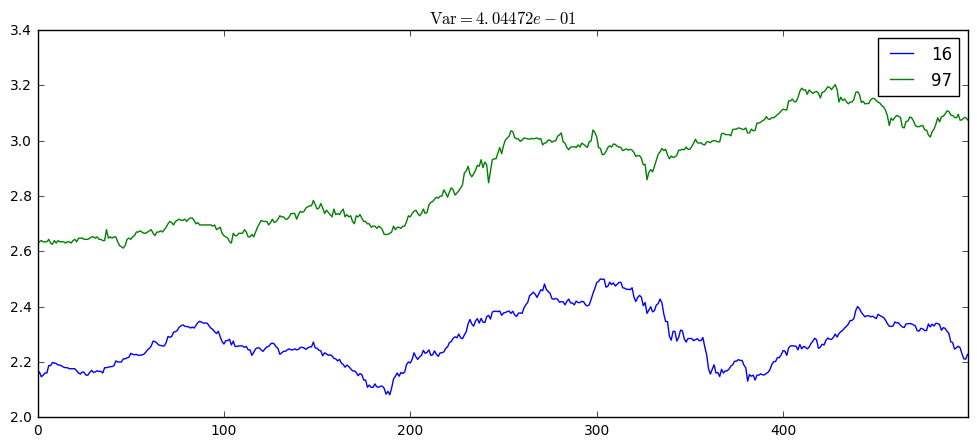

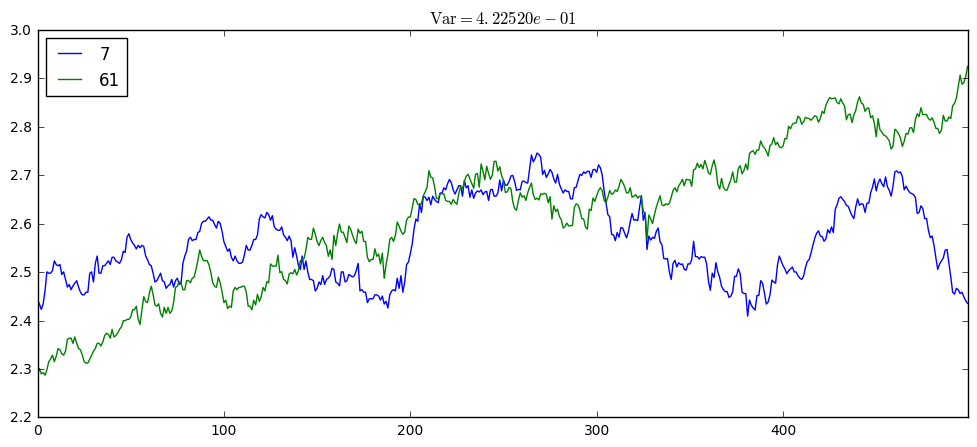

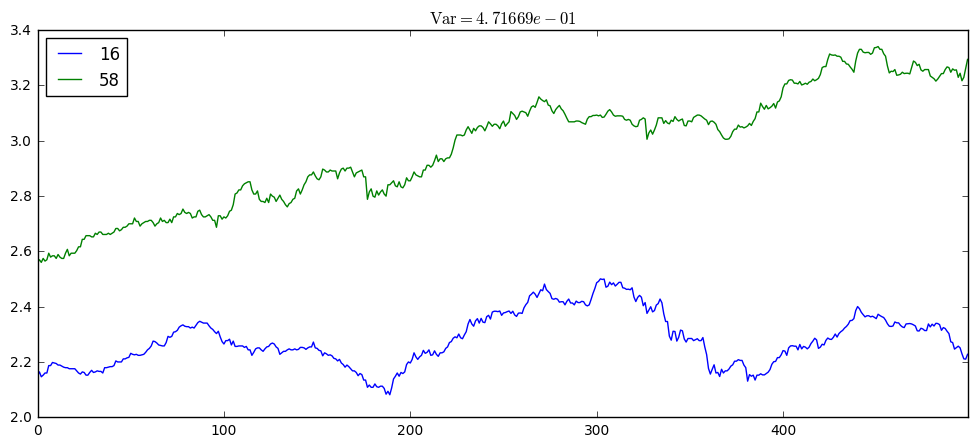

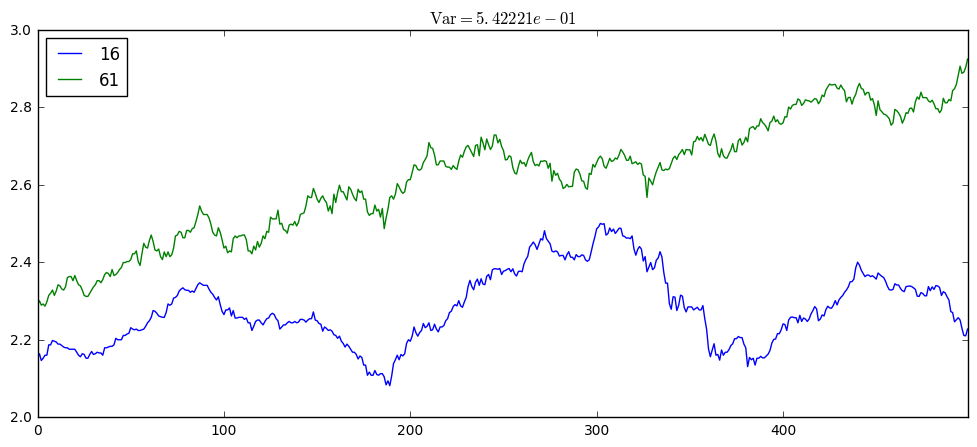

In [4]:
for (i, j), var in zip(worst, sorted_vars[-5:]):
    plt.figure()
    plt.plot(sp500_log[4321:4321 + T, i])
    plt.plot(sp500_log[4321:4321 + T, j])
    plt.legend((i, j), loc='best')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.title('$\\mathrm{{Var}}={:.5e}$'.format(var))
    

## Rasponi vrijednosti za parove s najmanjim varijancama

- **plavo:** dvije devijacije
- **zeleno:** polovica maksimalnog odstupanja

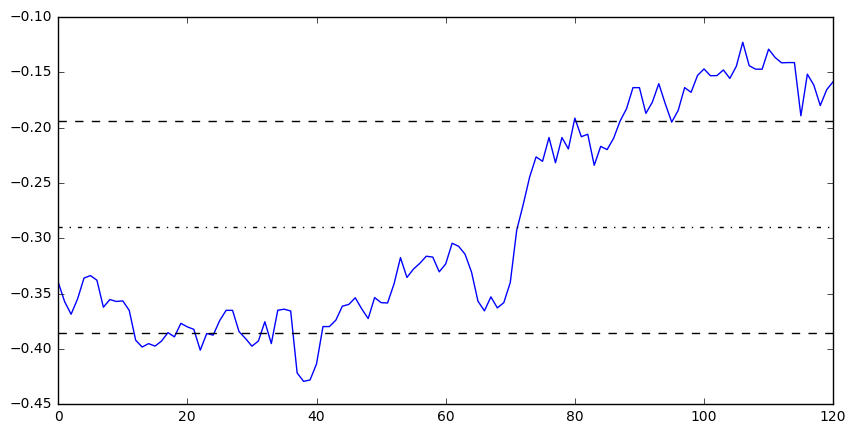

In [3]:
plt.figure()
c = 4
lower = sp500_log_diff_means[4321, c] - np.sqrt(sp500_log_diff_vars[4321, c])
upper = sp500_log_diff_means[4321, c] + np.sqrt(sp500_log_diff_vars[4321, c])
plt.plot(sp500_log_diffs[4321:4321 + T + 1, c], 'b-')
plt.plot([0, T], [sp500_log_diff_means[4321, c], sp500_log_diff_means[4321, c]], 'k-.')
plt.plot([0, T], [lower, lower], 'k--')
plt.plot([0, T], [upper, upper], 'k--')
# plt.plot((sp500_log_diffs[4321:4321 + T, c] - sp500_log_diff_means[4321, c]) / np.sqrt(sp500_log_diff_vars[4321, c]), 'g-')
# y1 = sp500_log_diff_means[4321, 31] - 2 * sp500_log_diff_stds[4321, 31]
# y2 = sp500_log_diff_means[4321, codes[i]] + 2 * sp500_log_diff_stds[4321, codes[i]]
# max_abs_dev = np.max(np.abs(sp500_log_diffs[4321:4321 + T - 1, codes[i]] - sp500_log_diff_means[4321, codes[i]]))
# z1 = sp500_log_diff_means[4321, codes[i]] - 0.5 * max_abs_dev
# z2 = sp500_log_diff_means[4321, codes[i]] + 0.5 * max_abs_dev
# plt.fill_between(range(501), y1, y2, facecolor='lightblue')
# plt.fill_between(range(501), z1, z2, facecolor='lightgreen')


# Statistička arbitraža

## Testiranje implementacije nad trivijalnim podacima

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]]
[[ 1. ]
 [ 1.2]
 [ 1.2]
 [ 1.2]
 [ 1.2]
 [ 1.2]
 [ 1. ]
 [ 0.8]
 [ 0.8]]
[[ 0. ]
 [ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0. ]
 [ 0.2]
 [ 0.2]]
[ 5 11]
[ 0.5  0.5]
[ 1.78885438  1.78885438]


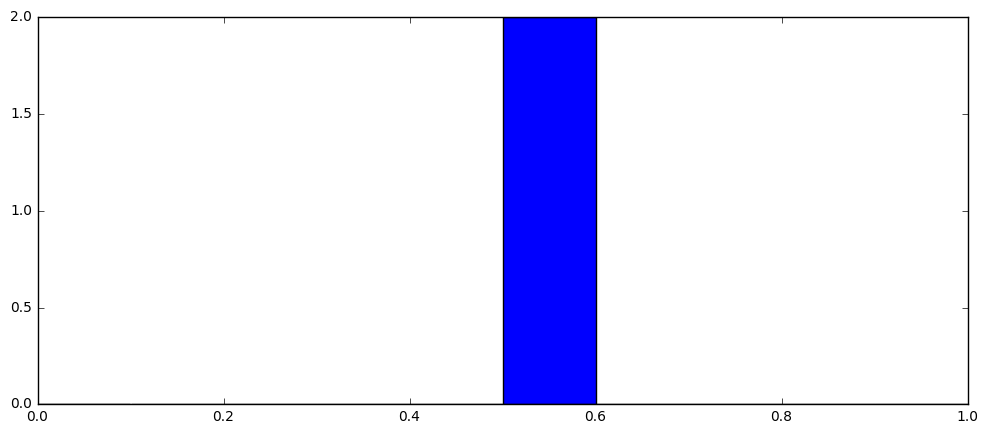

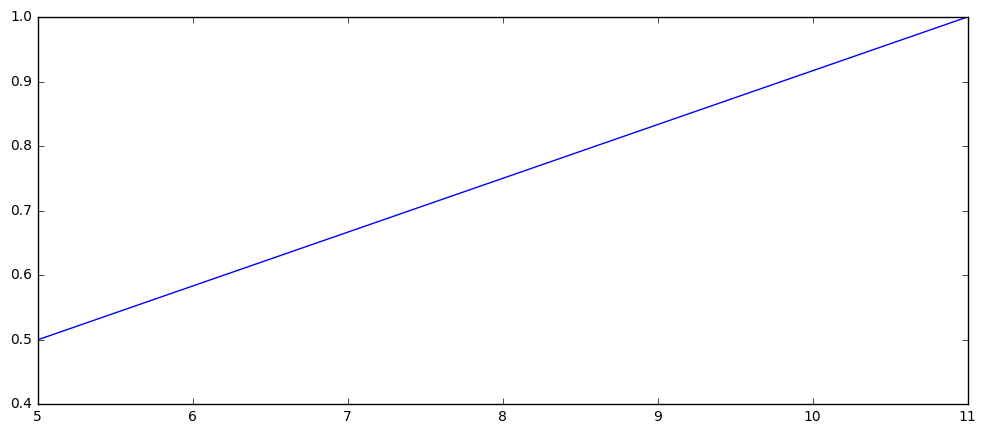

In [4]:
my_prices_logs = np.array([
        [2, 2, 2, 2, 2, 2.5, 2, 2, 2, 2, 2, 1.5, 2],
        [1, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1.5, 1],
        #[1, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1.5, 1],
        #[1, 10, 1, 10, 1, 10, 1, 10, 1, 10, 1, 10, 1]
        ]).transpose();

my_prices_diffs = calculate_pairwise_diffs(my_prices_logs)
my_prices_means, my_prices_vars = rolling_mean_variance(my_prices_diffs, 5)

ts, profit, pairs, weights = statistical_arbitrage(my_prices_diffs, my_prices_means, my_prices_vars,
                                                   1, 1, method='thresh-devs',
                                                   return_pairs=True, return_weights=True)

print(my_prices_diffs)
print(my_prices_means)
print(my_prices_vars)
print(ts)
print(profit)
print(weights)

plt.figure()
plt.hist(profit)
plt.figure()
plt.plot(ts, np.cumsum(profit));

## Variranje parametara p i d

### Metoda s fiksnim brojem parova p

p = 1, d = 1, profit = 1.0610121286665337, acc = 0.5428994082840237
p = 1, d = 1.5, profit = 0.7524311550212819, acc = 0.5393824826717076
p = 1, d = 2, profit = 0.39900758997399666, acc = 0.5208333333333334
p = 1, d = 2.5, profit = 0.3046186015529156, acc = 0.5539568345323741
p = 1, d = 3, profit = 0.12478262692667419, acc = 0.5643564356435643
p = 1, d = 3.5, profit = 0.11340420631127635, acc = 0.5471698113207547
p = 1, d = 4, profit = 0.0005595687792867565, acc = 0.5178571428571429
p = 1, d = 4.5, profit = 0.04341373415167338, acc = 0.5238095238095238
p = 1, d = 5, profit = 0.04097831626507231, acc = 0.5666666666666667
p = 2, d = 1, profit = 1.5990713742387257, acc = 0.5182857142857142
p = 2, d = 1.5, profit = 1.227301512725058, acc = 0.5210312075983717
p = 2, d = 2, profit = 0.6243982295042965, acc = 0.5114693118412895
p = 2, d = 2.5, profit = 0.613079973651388, acc = 0.5373891001267427
p = 2, d = 3, profit = 0.26021970256714333, acc = 0.5347593582887701
p = 2, d = 3.5, profit = 0.23

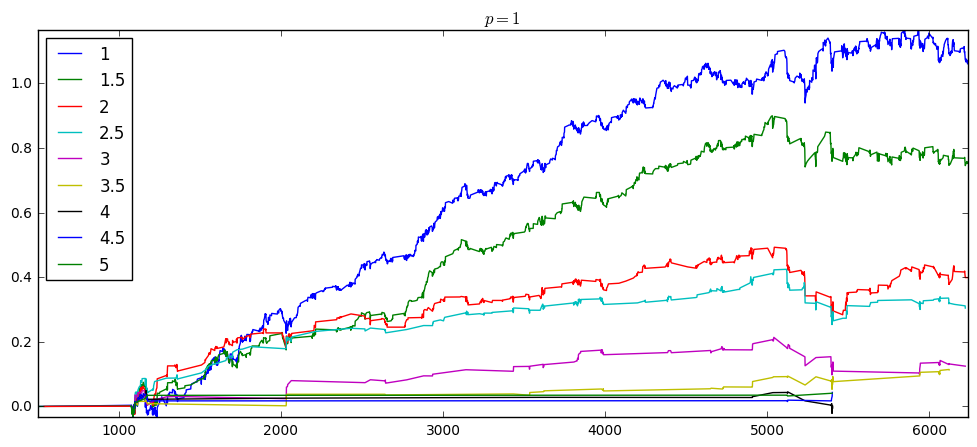

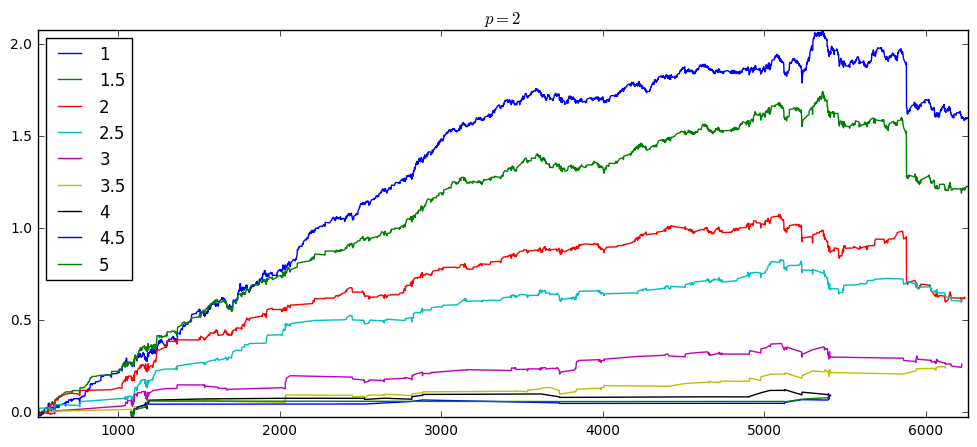

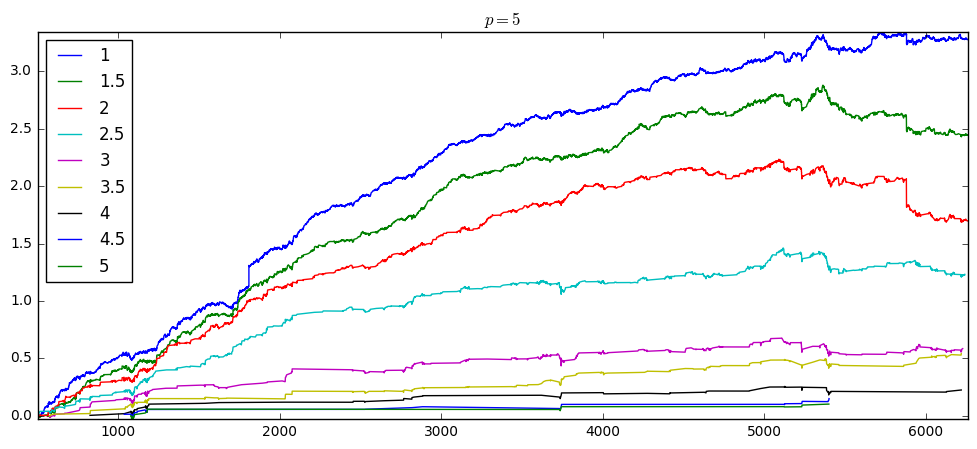

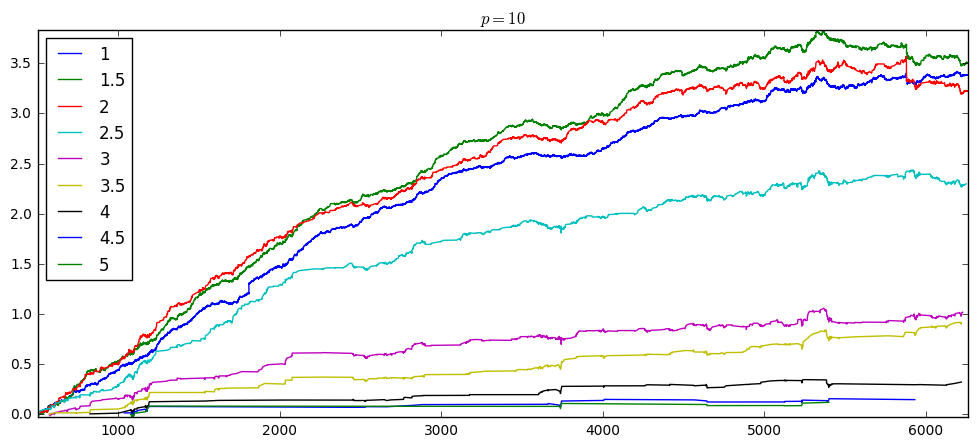

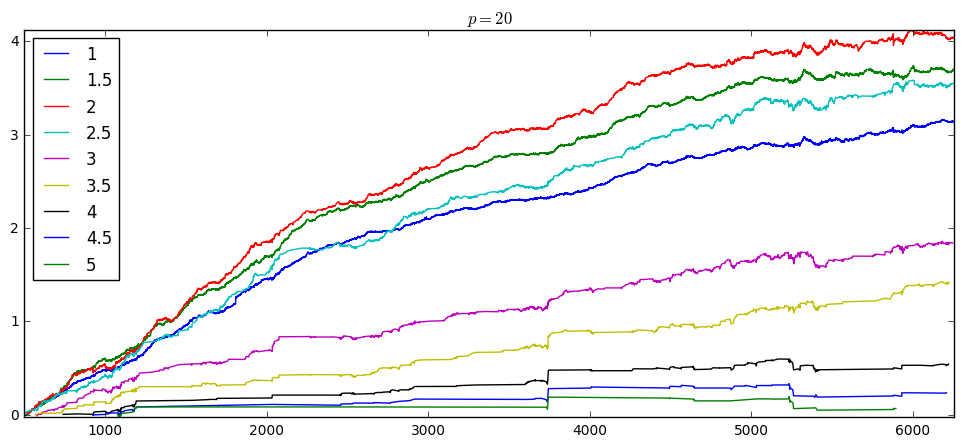

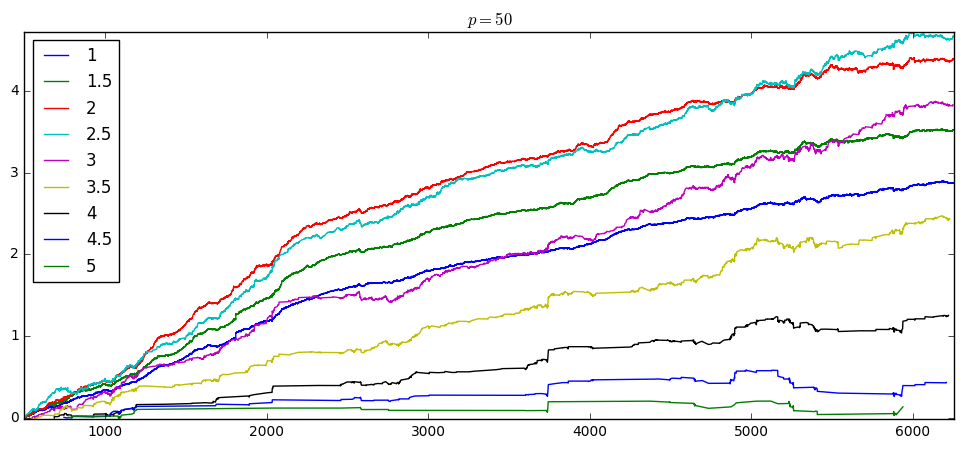

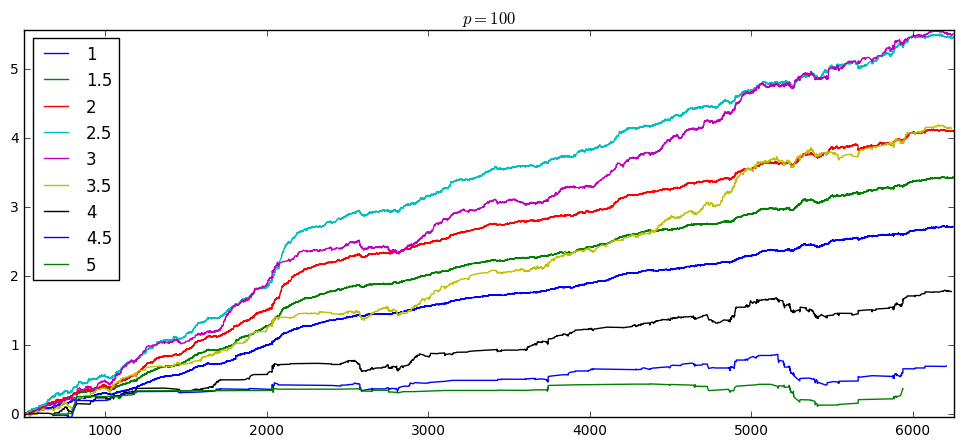

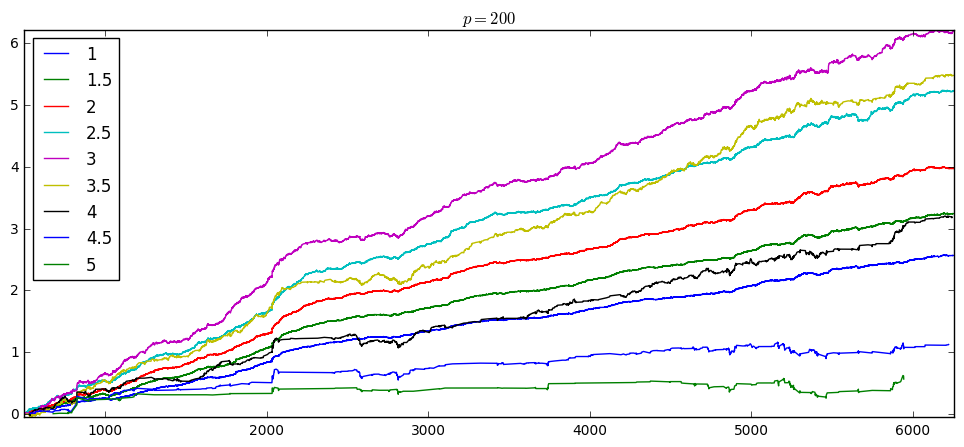

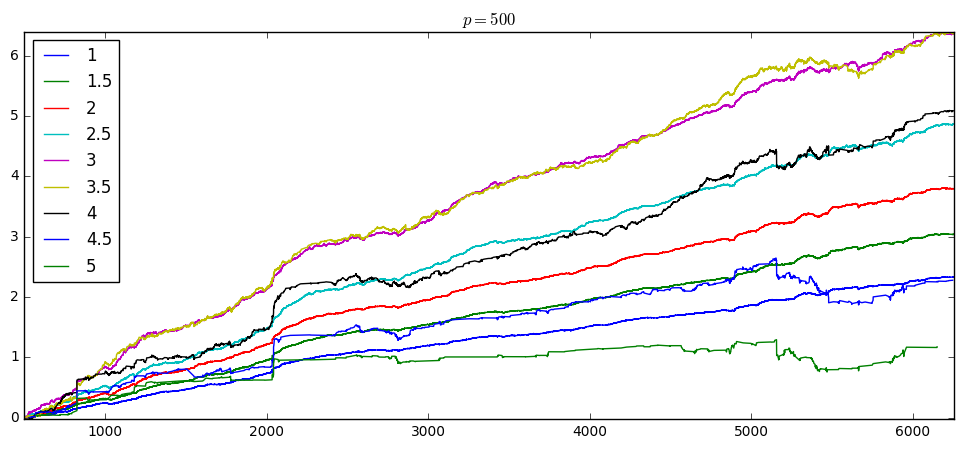

In [7]:
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
sp500_log = np.log(sp500)
days, N = sp500.shape
pairs = int(N * (N - 1) / 2)

T = 500
ps = [1, 2, 5, 10, 20, 50, 100, 200, 500]
ds = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

sp500_log_diffs = calculate_pairwise_diffs(sp500_log)
sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)

for p in ps:
    plt.figure()
    plt.title('$p={}$'.format(p))
    for d in ds:
        ts, profit = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars,
                                           p, d, method='devs')

        plt.plot(ts, np.cumsum(profit))
        plt.autoscale(enable=True, axis='x', tight=True)
        print('p = {}, d = {}, profit = {}, acc = {}'.format(p, d, np.sum(profit), np.sum(profit > 0) / len(profit)))
    plt.legend([str(d) for d in ds], loc='best')

del(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars)


### Metoda s fiksnim pragom varijacije

p = 0.001, d = 1, profit = 2.6031808135339607, acc = 0.5072269944961679
p = 0.001, d = 1.5, profit = 2.7023412151990382, acc = 0.5126102842883878
p = 0.001, d = 2, profit = 2.3295062924755814, acc = 0.5121252947120243
p = 0.001, d = 2.5, profit = 1.6018112221587324, acc = 0.524328249818446
p = 0.001, d = 3, profit = 0.7598774907832251, acc = 0.5224252491694352
p = 0.001, d = 3.5, profit = 0.660874424309694, acc = 0.5743243243243243
p = 0.001, d = 4, profit = 0.3141402072060798, acc = 0.5962732919254659
p = 0.001, d = 4.5, profit = 0.1290174899070795, acc = 0.5303030303030303
p = 0.001, d = 5, profit = 0.07483296416653507, acc = 0.5
p = 0.002, d = 1, profit = 2.6979200246285098, acc = 0.49803800082610494
p = 0.002, d = 1.5, profit = 3.1028223962884836, acc = 0.501882236733798
p = 0.002, d = 2, profit = 3.5056553265697317, acc = 0.508013659885609
p = 0.002, d = 2.5, profit = 3.900902631131225, acc = 0.5191148732575792
p = 0.002, d = 3, profit = 2.9208875058899344, acc = 0.523951068937921

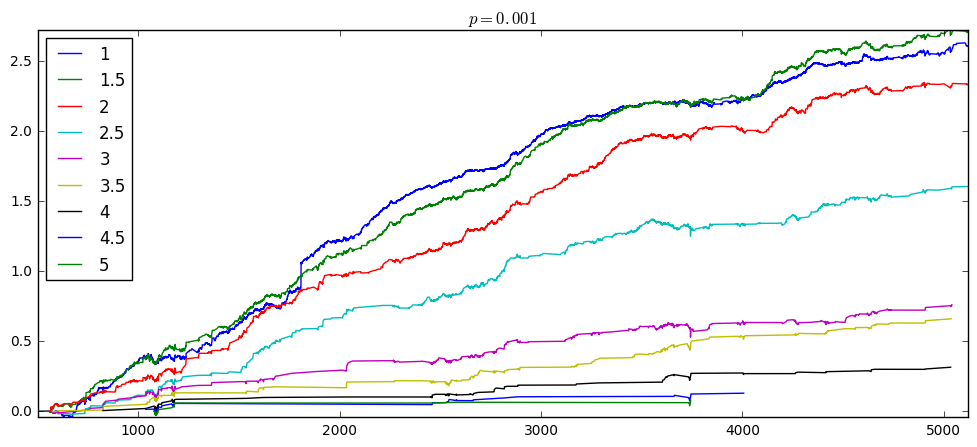

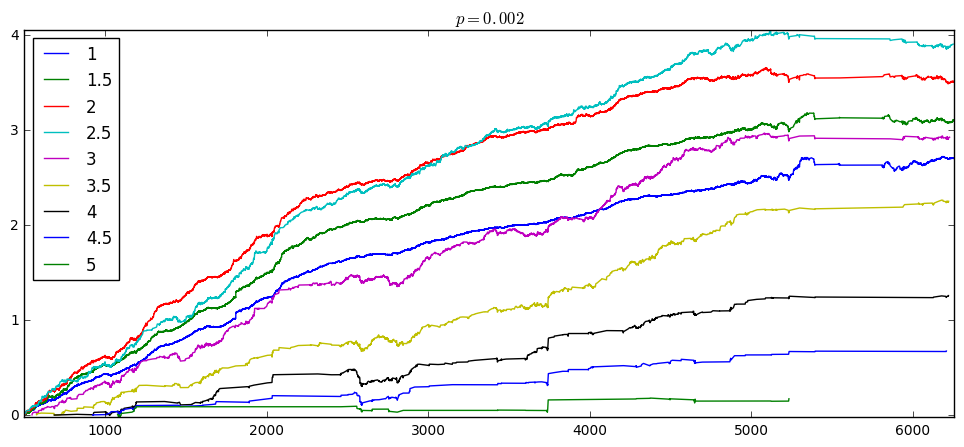

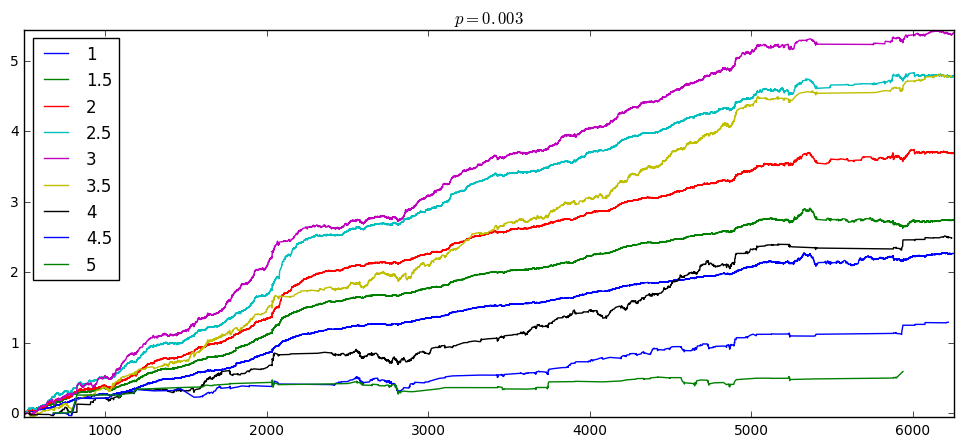

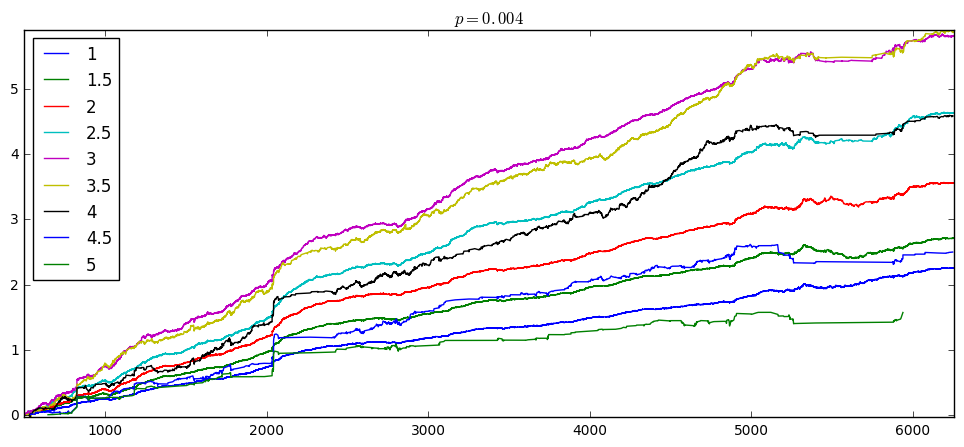

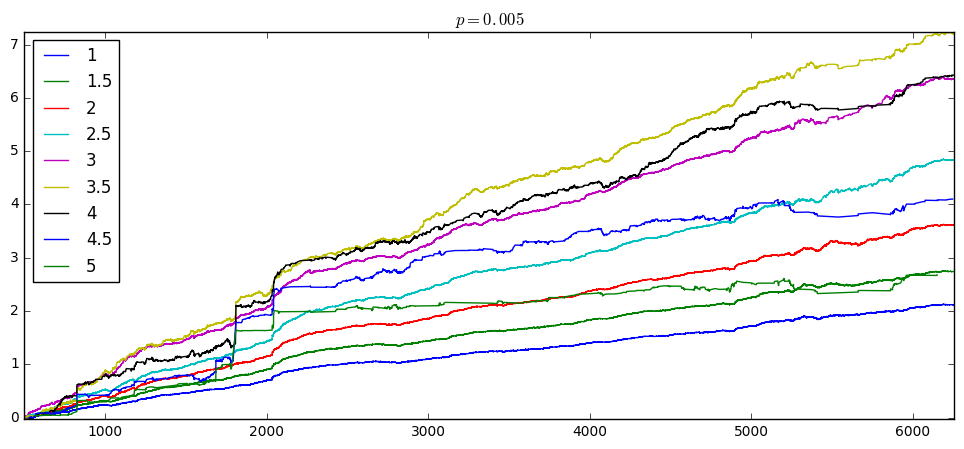

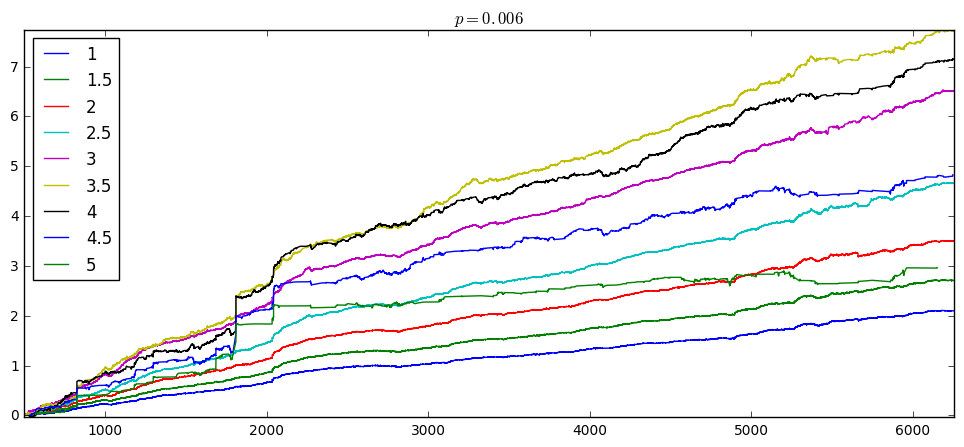

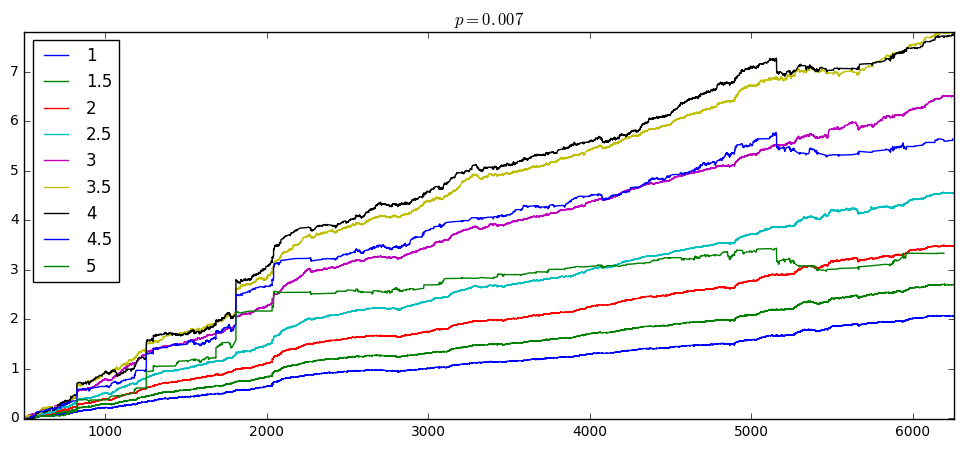

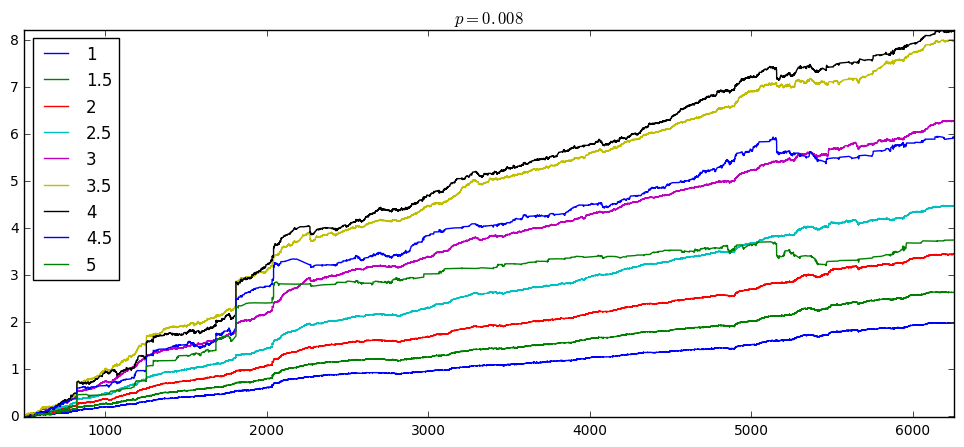

In [8]:
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
sp500 = sp500
sp500_log = np.log(sp500)
days, N = sp500.shape
pairs = int(N * (N - 1) / 2)

T = 500
ps = [1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3]
ds = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

sp500_log_diffs = calculate_pairwise_diffs(sp500_log)
sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)

for p in ps:
    plt.figure()
    plt.title('$p={}$'.format(p))
    for d in ds:
        ts, profit = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars,
                                           p, d, method='thresh-devs')

        plt.plot(ts, np.cumsum(profit))
        plt.autoscale(enable=True, axis='x', tight=True)
        print('p = {}, d = {}, profit = {}, acc = {}'.format(p, d, np.sum(profit),
                                                             np.sum(profit > 0) / len(profit)))
        del(ts, profit)
        
    plt.legend([str(d) for d in ds], loc='best')
    
del(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars)


# Grafovi

In [ ]:
for v in ["sp500_log_diffs", "sp500_log_diff_means", "sp500_log_diff_vars", "sp500", "sp500_log"]:
    try:
        del globals()[v]
    except:
        pass

sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
# sp500 = sp500[:2000, :]
days, N = sp500.shape
sp500_log = np.log(sp500)
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

T = 120
p = 0.000
d = 3.75

method = 'thresh-devs'

sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)

ts, profits_old, pairs, weights = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, 
                                                        sp500_log_diff_vars, p, d, 
                                                        method=method, return_pairs=True, 
                                                        return_weights=True)



In [3]:
ppairs = partition_as(ts, pairs, weights)
try:
    os.mkdir('../graphs/p_{}_d_{}_{}'.format(p, d, method))
except:
    pass
for t, ppair, weight in ppairs:
    graph = nx.DiGraph()
    graph.add_edges_from(ppair, weight=weight)
    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos)
    labels = nx.get_node_attributes(graph, 'labels')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    dot = nx.drawing.nx_pydot.to_pydot(graph)
    
    dot.write_svg('../graphs/p_{}_d_{}_{}/output_{:04d}.svg'.format(p, d, method, t), prog='sfdp')
    
    preferences = calculate_preference_flow(ppair, weights)
    for n in dot.get_node_list():
        n.set_label('{:.3f}'.format(preferences[int(n.get_name())]))
    dot.write_svg('../graphs/p_{}_d_{}_{}/output_{:04d}_f.svg'.format(p, d, method, t), prog='sfdp')
    try:
        nx.find_cycle(graph, orientation='original')
    except:
        pass
    else:
        print('Cycle detected @ t={}'.format(t))
        
    try:
        nx.find_cycle(graph, orientation='reverse')
    except:
        pass
    else:
        print('Cycle detected @ t={}'.format(t))


NameError: name 'ts' is not defined

In [11]:
calculate_preference_flow([('A', 'B'), ('D', 'B'), ('C', 'B'), ('E', 'F'), ('F', 'B')], scale=True)

{'A': 1.0, 'B': -4.0, 'C': 1.0, 'D': 1.0, 'E': 1.0, 'F': 0.0}

accuracy: 0.48022001269304


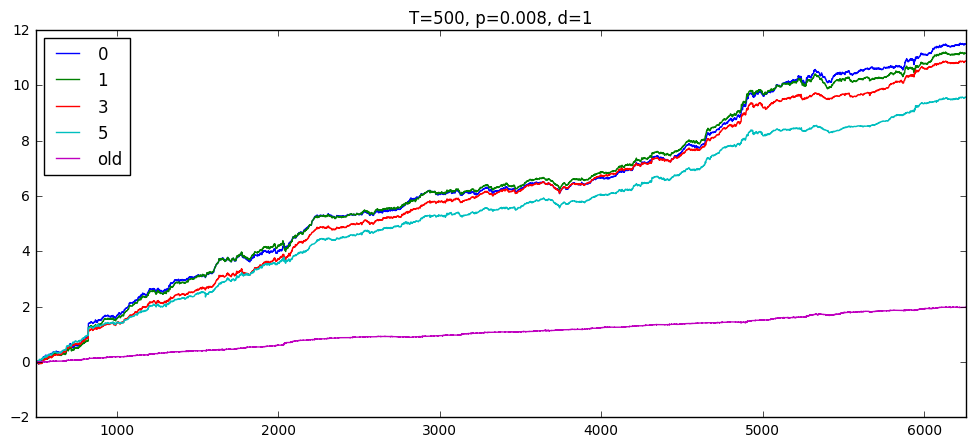

In [12]:
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
sp500 = sp500
sp500_log = np.log(sp500)
days, N = sp500.shape
P = int(N * (N - 1) / 2)

T = 500
# sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

ls = [0, 1, 3, 5]
for l in ls:
    ppairs = partition_as(ts, pairs)
    profit = []
    cumprofit = []
    # abscumprofit = []
    tss = []
    for t, ppair in log_progress(list(ppairs)):
        preferences = calculate_preference_flow(ppair, scale=True)
        m = max(np.abs(list(preferences.values())))
        # n = min(preferences.values())
        # psize = len(preferences)
        tops = np.array([k for k, v in preferences.items() if v >= m - l])
        bottoms = np.array([k for k, v in preferences.items() if -m + l >= v])
        # code = encode_pair(top, bottom, N)
        # p = trade_pair(sp500_log_diffs, t, code, top > bottom)
        p = []
        ttops = np.array([t] * len(tops))
        tbottoms = np.array([t] * len(bottoms))
        if (len(tops) != 0):
            p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
        if (len(bottoms) != 0):
            p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
        profit.extend([p_ / len(p) for p_ in p])
        cumprofit.append(np.sum(profit))
        # abscumprofit.append(np.sum(np.abs(profit)))
        tss.append(t)

    tss = np.array(tss)
    plt.plot(tss, cumprofit)
    
plt.plot(ts, np.cumsum(profits_old))
#plt.plot(tss, abscumprofit)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(ls + ['old'], loc='best')
plt.title('T={}, p={}, d={}'.format(T, 0.008, d))
print('accuracy: {}'.format(np.sum(np.array(profit) > 0) / len(profit)))

accuracy: 0.4620152268916802


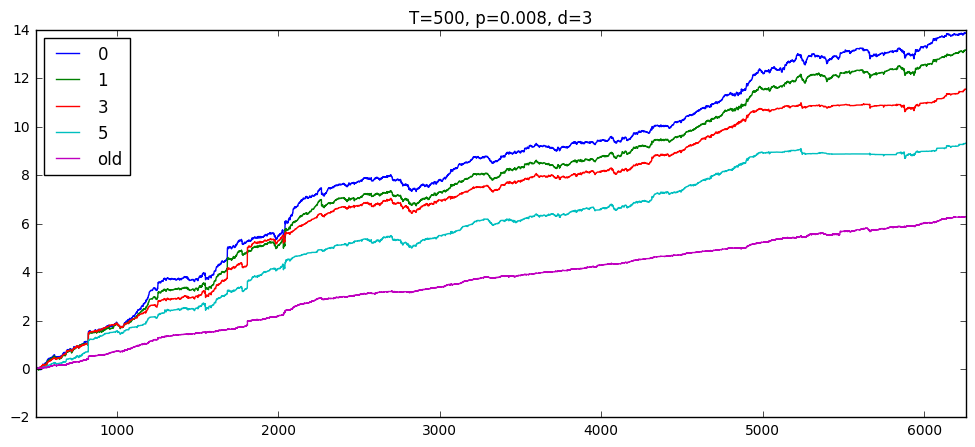

In [13]:
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
# sp500 = sp500[:2000, :]
days, N = sp500.shape
sp500_log = np.log(sp500)
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

T = 500
p = 0.008
d = 3

method = 'thresh-devs'

sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)
del(sp500, sp500_log)

ts, profits_old, pairs, weights = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, 
                                                        sp500_log_diff_vars, p, d, 
                                                        method=method, return_pairs=True, 
                                                        return_weights=True)
del(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars)
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
sp500_log = np.log(sp500)
days, N = sp500.shape
P = int(N * (N - 1) / 2)

T = 500
# sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

ls = [0, 1, 3, 5]
for l in ls:
    ppairs = partition_as(ts, pairs)
    profit = []
    cumprofit = []
    # abscumprofit = []
    tss = []
    for t, ppair in log_progress(list(ppairs)):
        preferences = calculate_preference_flow(ppair, scale=True)
        m = max(np.abs(list(preferences.values())))
        # n = min(preferences.values())
        # psize = len(preferences)
        tops = np.array([k for k, v in preferences.items() if v >= m - l])
        bottoms = np.array([k for k, v in preferences.items() if -m + l >= v])
        # code = encode_pair(top, bottom, N)
        # p = trade_pair(sp500_log_diffs, t, code, top > bottom)
        p = []
        ttops = np.array([t] * len(tops))
        tbottoms = np.array([t] * len(bottoms))
        if (len(tops) != 0):
            p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
        if (len(bottoms) != 0):
            p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
        profit.extend([p_ / len(p) for p_ in p])
        cumprofit.append(np.sum(profit))
        # abscumprofit.append(np.sum(np.abs(profit)))
        tss.append(t)

    tss = np.array(tss)
    plt.plot(tss, cumprofit)
    
plt.plot(ts, np.cumsum(profits_old))
#plt.plot(tss, abscumprofit)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(ls + ['old'], loc='best')
plt.title('T={}, p={}, d={}'.format(T, 0.008, d))
print('accuracy: {}'.format(np.sum(np.array(profit) > 0) / len(profit)))

In [14]:
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
days, N = sp500.shape
sp500_log = np.log(sp500)
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

T = 500
p = 0.008
d = 3

method = 'thresh-devs'

sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)
del(sp500, sp500_log)

ts, profits_old, pairs, weights = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, 
                                                        sp500_log_diff_vars, p, d, 
                                                        method=method, return_pairs=True, 
                                                        return_weights=True)
del(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars)
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
sp500_log = np.log(sp500)
days, N = sp500.shape
P = int(N * (N - 1) / 2)

T = 500

ppairs = partition_as(ts, pairs)
profit = []
shares = []
ts = []
print('starting arbitrage...')
for t, ppair in log_progress(list(ppairs)):
    preferences = calculate_preference_flow(ppair, scale=True)
    m = max(np.abs(list(preferences.values())))
    tops = np.array([k for k, v in preferences.items() if v >= m])
    bottoms = np.array([k for k, v in preferences.items() if -m >= v])
    p = []
    if (len(tops) != 0):
        ttops = np.array([t] * len(tops))
        p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
        shares.extend(tops)
        ts.extend(ttops)
    if (len(bottoms) != 0):
        tbottoms = np.array([t] * len(bottoms))
        p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
        shares.extend(bottoms)
        ts.extend(tbottoms)
    profit.extend([p_ / len(p) for p_ in p])

shares = np.array(shares)
ts = np.array(ts)
profit = np.array(profit)

starting arbitrage...


<Container object of 198 artists>

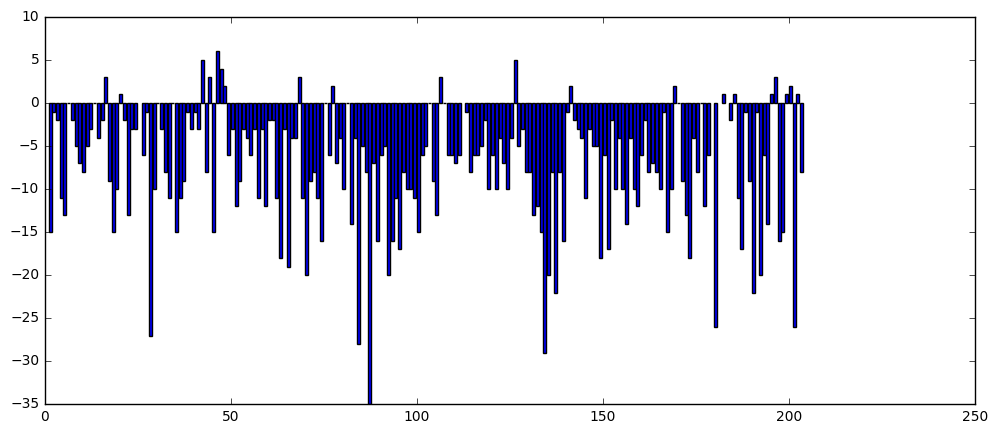

In [15]:
neg_shares = shares[profit < 0]
ts_neg_shares = ts[profit < 0]
pos_shares = shares[profit >= 0]
ts_pos_shares = ts[profit >= 0]

cnt = Counter(neg_shares)
cnt.subtract(Counter(pos_shares))
plt.bar(cnt.keys(), cnt.values())


/home/frka/anaconda3/lib/python3.5/site-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "Best". Falling back on "best"; valid locations are
	lower left
	center right
	best
	center left
	upper left
	right
	center
	upper right
	lower center
	lower right
	upper center

  six.iterkeys(self.codes))))


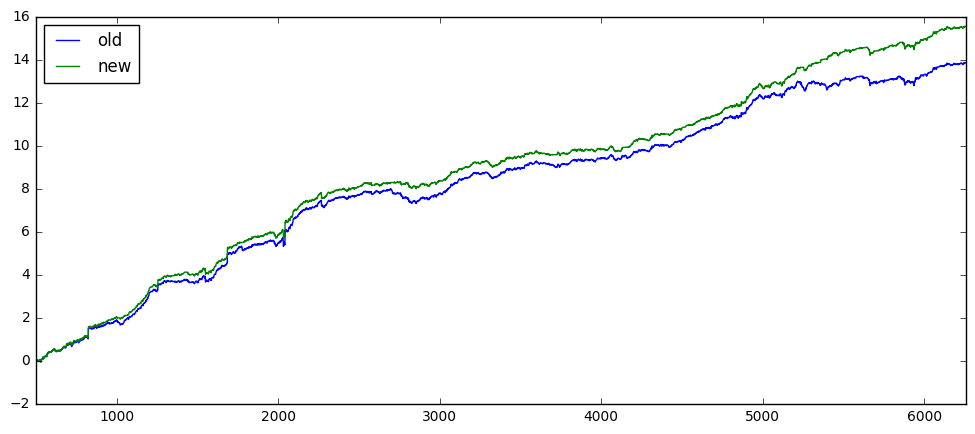

In [17]:
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
days, N = sp500.shape
sp500_log = np.log(sp500)
sp500_log_diffs = calculate_pairwise_diffs(sp500_log)

T = 500
p = 0.008
d = 3

method = 'thresh-devs'

sp500_log_diff_means, sp500_log_diff_vars = rolling_mean_variance(sp500_log_diffs, T)
del(sp500, sp500_log)

ts, profits_old, pairs, weights = statistical_arbitrage(sp500_log_diffs, sp500_log_diff_means, 
                                                        sp500_log_diff_vars, p, d, 
                                                        method=method, return_pairs=True, 
                                                        return_weights=True)
del(sp500_log_diffs, sp500_log_diff_means, sp500_log_diff_vars)
sp500 = np.genfromtxt('../data/stock_prices_sp500.csv', delimiter=',')
sp500_log = np.log(sp500)
days, N = sp500.shape
P = int(N * (N - 1) / 2)

T = 500

ppairs = partition_as(ts, pairs)
profit = []
cumprofit = []
shares = []
ts_shares = []
tss = []
for t, ppair in log_progress(list(ppairs)):
    preferences = calculate_preference_flow(ppair, scale=True)
    m = max(np.abs(list(preferences.values())))
    tops = np.array([k for k, v in preferences.items() if v >= m])
    bottoms = np.array([k for k, v in preferences.items() if -m >= v])
    p = []
    if (len(tops) != 0):
        ttops = np.array([t] * len(tops))
        p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
        shares.extend(tops)
        ts_shares.extend(ttops)
    if (len(bottoms) != 0):
        tbottoms = np.array([t] * len(bottoms))
        p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
        shares.extend(bottoms)
        ts_shares.extend(tbottoms)
    profit.extend([p_ / len(p) for p_ in p])
    cumprofit.append(np.sum([p_ / len(p) for p_ in p]))
    tss.append(t)
    
plt.plot(tss, np.cumsum(cumprofit))

shares = np.array(shares)
ts_shares = np.array(ts_shares)
profit = np.array(profit)
neg_shares = shares[profit < 0]
ts_neg_shares = ts_shares[profit < 0]
pos_shares = shares[profit >= 0]
ts_pos_shares = ts_shares[profit >= 0]

cnt = Counter(neg_shares)
cnt.subtract(Counter(pos_shares))

blacklist = [k for k, v in cnt.items() if v >= -1]

ppairs = partition_as(ts, pairs)
profit = []
cumprofit = []
tss = []
for t, ppair in log_progress(list(ppairs)):
    preferences = calculate_preference_flow(ppair, scale=True)
    m = max(np.abs(list(preferences.values())))
    tops = np.array([k for k, v in preferences.items() if v >= m and k not in blacklist])
    bottoms = np.array([k for k, v in preferences.items() if -m >= v and k not in blacklist])
    p = []
    if (len(tops) != 0):
        ttops = np.array([t] * len(tops))
        p.extend(trade_singles(sp500_log, ttops, tops, inv=False))
    if (len(bottoms) != 0):
        tbottoms = np.array([t] * len(bottoms))
        p.extend(trade_singles(sp500_log, tbottoms, bottoms, inv=True))
    profit.extend([p_ / len(p) for p_ in p])
    cumprofit.append(np.sum([p_ / len(p) for p_ in p]))
    tss.append(t)

plt.plot(tss, np.cumsum(cumprofit))
plt.legend(['old', 'new'], loc='best')
plt.autoscale(enable=True, axis='x', tight=True)
